In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")
os.getenv('PUI2016')

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv('PUI2016')

'/home/cusp/jc7344/PUI2016'

In [3]:
os.getenv('PUIDATA')

'/home/cusp/jc7344/PUIdata'

In [4]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201501-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6845k  100 6845k    0     0  3098k      0  0:00:02  0:00:02 --:--:-- 3350k


In [5]:
get_ipython().system('unzip 201501-citibike-tripdata.zip')

Archive:  201501-citibike-tripdata.zip
replace 201501-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [6]:
CitiBike = pd.read_csv('201501-citibike-tripdata.csv')
CitiBike.head

<bound method DataFrame.head of         tripduration        starttime         stoptime  start station id  \
0               1346    1/1/2015 0:01    1/1/2015 0:24               455   
1                363    1/1/2015 0:02    1/1/2015 0:08               434   
2                346    1/1/2015 0:04    1/1/2015 0:10               491   
3                182    1/1/2015 0:04    1/1/2015 0:07               384   
4                969    1/1/2015 0:05    1/1/2015 0:21               474   
5                496    1/1/2015 0:07    1/1/2015 0:15               512   
6                152    1/1/2015 0:07    1/1/2015 0:09               498   
7               1183    1/1/2015 0:08    1/1/2015 0:28               405   
8                846    1/1/2015 0:09    1/1/2015 0:23               450   
9                576    1/1/2015 0:10    1/1/2015 0:20               160   
10               540    1/1/2015 0:10    1/1/2015 0:19               291   
11               419    1/1/2015 0:11    1/1/2015 0:18  

In [7]:
CitiBike.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [8]:
CitiBike.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'usertype', 'gender'], axis = 1, inplace = True)

In [9]:
CitiBike.head()

,birth year
0,1960.0
1,1963.0
2,1974.0
3,1969.0
4,1977.0


In [11]:
CitiAge = CitiBike['birth year'] > 1920
CitiBike[CitiAge].dropna().values
#By adjusting age date of birth after 1920, we are givin age a paramater 

array([[ 1960.],
       [ 1963.],
       [ 1974.],
       ..., 
       [ 1994.],
       [ 1957.],
       [ 1974.]])

In [12]:
age_citi = (2016 - CitiBike[CitiAge].dropna().values).flatten()
age_citi

array([ 56.,  53.,  42., ...,  22.,  59.,  42.])

In [13]:
mean_citi = np.mean(age_citi)
mean_citi

41.016529486817511

In [14]:
std_citi = np.std(age_citi)
std_citi, mean_citi

(11.473887375120887, 41.016529486817511)

In [15]:
import scipy.stats

In [16]:
scipy.stats.ks_2samp

<function scipy.stats.stats.ks_2samp>

In [17]:
scipy.stats.kstest(age_citi, 'norm', args = (mean_citi, std_citi))

KstestResult(statistic=0.088109171739417902, pvalue=0.0)

H0= there is no significant difference between Age distribution of Citibike users (age_citi) and the Gaussian distributon. 


H1= There is a significant difference between Age distribution of CitiBike users (age_citi) and the Gaussian distribution. 

Since p<.05 we succeed to reject the Null Hypohesis and accepted the alternative. There is a significant difference between the age distribution and citibike users'gaussian distribution. 

(array([  1.70000000e+01,   4.18000000e+02,   5.60900000e+03,
          3.11720000e+04,   8.11170000e+04,   9.54370000e+04,
          5.18490000e+04,   1.27240000e+04,   1.38600000e+03,
          7.40000000e+01]),
 array([-13.88623381,  -3.36261268,   7.16100844,  17.68462956,
         28.20825068,  38.7318718 ,  49.25549292,  59.77911404,
         70.30273517,  80.82635629,  91.34997741]),
 <a list of 10 Patch objects>)

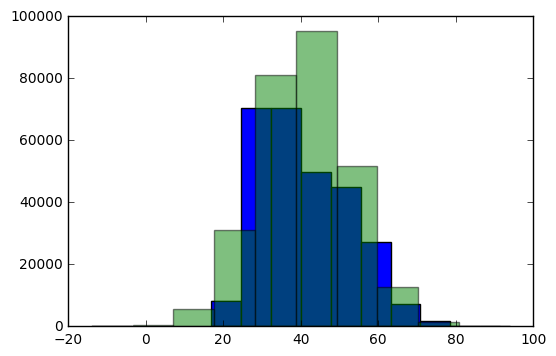

In [18]:
pl.hist(age_citi)
pl.hist(scipy.stats.norm.rvs(loc=mean_citi, scale=std_citi, size=len(age_citi)),alpha=0.5)

In [19]:
dir(scipy.stats)

['Tester',
 '__all__',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_stats',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betai',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisqprob',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'entropy',
 'erlang',
 'expon',
 'exponnorm',


In [20]:
scipy.stats.norm

In [21]:
scipy.stats.kstest(age_citi, 'poisson', args = (mean_citi, std_citi))

KstestResult(statistic=0.54220670962452056, pvalue=0.0)

In [23]:
scipy.stats.poisson.rvs

<bound method poisson_gen.rvs of <scipy.stats._discrete_distns.poisson_gen object at 0x7fd994da2c10>>

In [24]:
scipy.stats.norm.rvs

<bound method norm_gen.rvs of <scipy.stats._continuous_distns.norm_gen object at 0x7fd994ded710>>

TypeError: _parse_args_rvs() got an unexpected keyword argument 'scale'

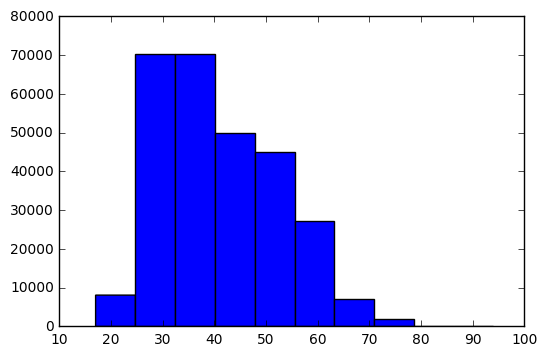

In [25]:
pl.hist(age_citi)
pl.hist(scipy.stats.poisson.rvs(loc=mean_citi, scale=std_citi, size=len(age_citi)),alpha=0.5)

In [26]:
ad_norm = scipy.stats.anderson(age_citi,'norm')
print (ad_norm)

AndersonResult(statistic=2780.102341594873, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


In [27]:
ad_expon = scipy.stats.anderson(age_citi,'expon')
print (ad_expon)

AndersonResult(statistic=67471.917322958063, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


H0= there is no significant difference between Age distribution of Citibike users (age_citi) and the Gaussian distributon. 


H1= There is a significant difference between Age distribution of CitiBike users (age_citi) and the Gaussian distribution.

Given the fact that the result of the Anderson Darling test was larger than the significace levels, we succeed to reject the Null Hypothesis.